<a href="https://colab.research.google.com/github/HowardHNguyen/Data_Science_for_Marketing_Solutions/blob/main/EDA_Visualizing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Visualizing data is a critical component of Exploratory Data Analysis (EDA). It helps us understand relationships, patterns, and hidden trends within our data much better. With the right charts or visuals, trends within large and complex datasets can be easily interpreted, and hidden patterns or outliers can be easily identified. In Python, data can be visualized using a wide array of libraries, and in this chapter, we will explore the most common data visualization libraries in Python.

We will leverage the pandas, matplotlib, seaborn, plotnine, and bokeh libraries

Before visualizing our data, it is important to get a glimpse of what the data looks like. This step basically involves inspecting our data to get a sense of the shape, data types, and type of information. Without this critical step, we may end up using the wrong visuals for analyzing our data. Visualizing data is never one size fits all because different charts and visuals require different data types and numbers of variables. This must always be factored in when visualizing data. Also, we may be required to transform our data before EDA; inspecting our data helps us identify whether transformation is required before proceeding to EDA. Lastly, this step helps us to identify whether there are additional variables that can be created from transforming or combining existing variables, such as in feature engineering.

In pandas, the head, dtypes, and shape methods are good ways to get a glimpse of our data.

## Preparing data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [5]:
houseprices_data = pd.read_csv("/content/drive/MyDrive/_Python/Exploratory-Data-Analysis-with-Python/Ch3/Data/HousingPricesData.csv")

#### Inspect the dataframe

In [6]:
houseprices_data.head(5)

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


In [8]:
houseprices_data = houseprices_data[['Zip','Price','Area','Room']]
houseprices_data

,Zip,Price,Area,Room
0,1091 CR,685000.0,64,3
1,1059 EL,475000.0,60,3
2,1097 SM,850000.0,109,4
3,1060 TH,580000.0,128,6
4,1036 KN,720000.0,138,5
...,...,...,...,...
919,1097 AE,750000.0,117,1
920,1033 CP,350000.0,72,3
921,1058 AK,350000.0,51,3
922,1095 MB,599000.0,113,4


In [9]:
houseprices_data.dtypes

,0
Zip,object
Price,float64
Area,int64
Room,int64


In [10]:
# create a price per sqm variable based on the price and area variable
houseprices_data['price_per_sqm'] = houseprices_data['Price']/houseprices_data['Area']
houseprices_data.head()

,Zip,Price,Area,Room,price_per_sqm
0,1091 CR,685000.0,64,3,10703.125000
1,1059 EL,475000.0,60,3,7916.666667
2,1097 SM,850000.0,109,4,7798.165138
3,1060 TH,580000.0,128,6,4531.250000
4,1036 KN,720000.0,138,5,5217.391304


## Visualizing data in Matplotlib
matplotlib is a data visualization library for creating static and interactive visualizations in Python. It contains a wide variety of visual options, such as line charts, bar charts, histograms, and many more. It is built on NumPy arrays. matplotlib is a low-level API that provides flexibility for both simple and complex visuals. However, this also means that achieving simple tasks can be quite cumbersome.

The pyplot module within matplotlib handles visualization needs. Some important concepts we will typically encounter while using the matplotlib library include the following:
- Figure: This is the frame within which graphs are plotted. Simply put, the figure is where the plotting is done.
- Axes: These are the horizontal and vertical lines (x and y axes) that provide the border for the graph and act as a reference for measurement.
- Ticks: These are the small lines that help us demarcate our axes.
- Title: This is the title of our graph...

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
# sort houses based on prices
houseprices_sorted = houseprices_data.sort_values(by='Price', ascending=False)
houseprices_sorted

,Zip,Price,Area,Room,price_per_sqm
195,1017 EL,5950000.0,394,10,15101.522843
837,1075 AH,5850000.0,480,14,12187.500000
305,1016 AE,4900000.0,623,13,7865.168539
103,1017 ZP,4550000.0,497,13,9154.929577
179,1012 JS,4495000.0,178,5,25252.808989
...,...,...,...,...,...
608,1025 ZM,175000.0,28,1,6250.000000
73,1017 VV,NaN,147,3,NaN
321,1067 HP,NaN,366,12,NaN
610,1019 HT,NaN,107,3,NaN


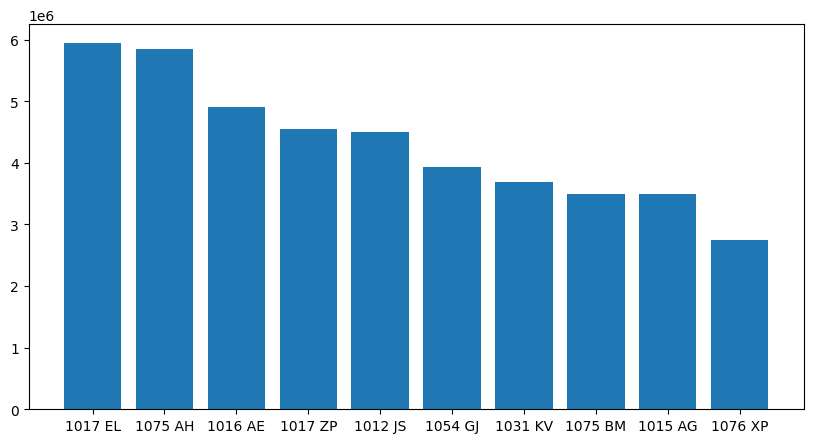

In [16]:
# plot a bar chart using matplotlib
plt.figure(figsize=(10,5))
x = houseprices_sorted['Zip'][0:10]
y = houseprices_sorted['Price'][0:10]
plt.bar(x,y)
plt.show()

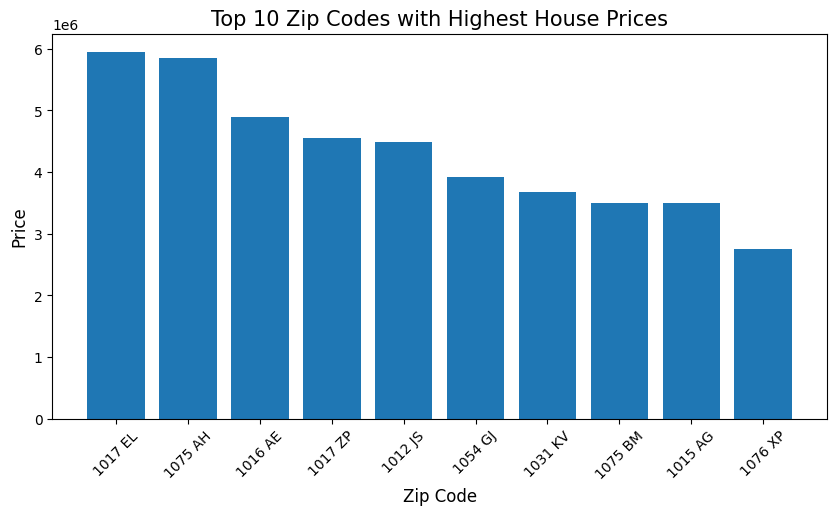

In [18]:
# add other details to make the chart more info
plt.figure(figsize=(10,5))
plt.bar(x,y)
plt.title('Top 10 Zip Codes with Highest House Prices', fontsize=15)
plt.xlabel('Zip Code', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.ylabel('Price', fontsize=12)
plt.yticks(fontsize=10)
plt.show()

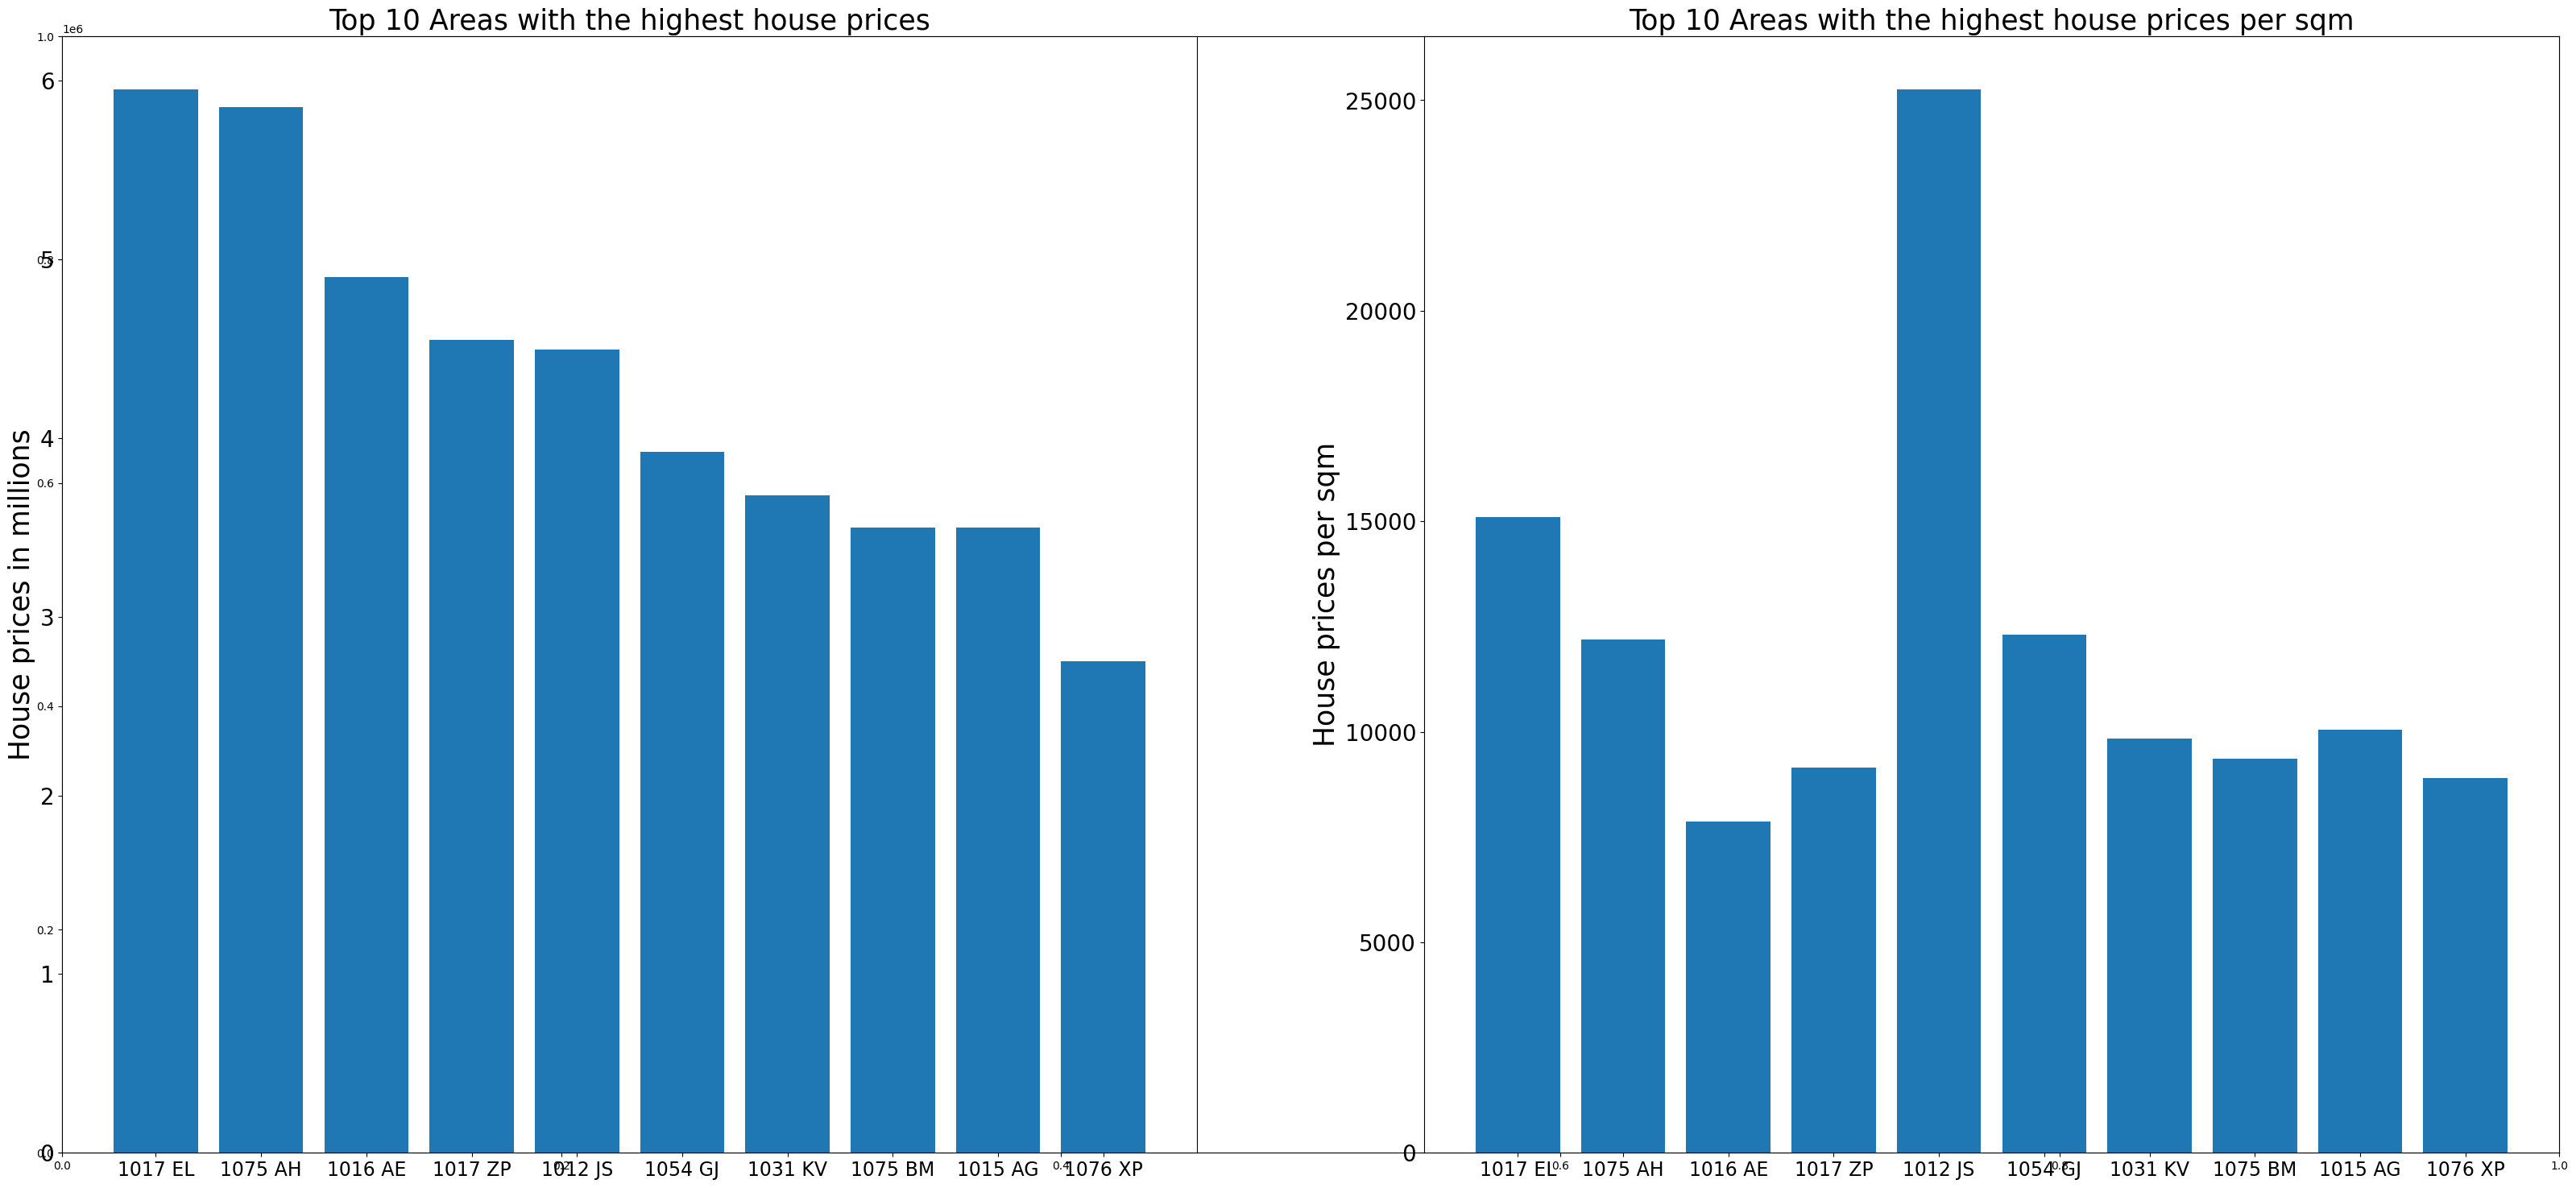

In [20]:
# create sbuplots
fig, ax = plt.subplots(figsize=(40,18))

x = houseprices_sorted['Zip'][0:10]
y = houseprices_sorted['Price'][0:10]
y1 = houseprices_sorted['price_per_sqm'][0:10]

plt.subplot(1,2,1)
plt.bar(x,y)
plt.xticks(fontsize=17)
plt.ylabel('House prices in millions', fontsize=25)
plt.yticks(fontsize=20)
plt.title('Top 10 Areas with the highest house prices', fontsize=25)

plt.subplot(1,2,2)
plt.bar(x,y1)
plt.xticks(fontsize=17)
plt.ylabel('House prices per sqm', fontsize=25)
plt.yticks(fontsize=20)
plt.title('Top 10 Areas with the highest house prices per sqm', fontsize=25)
plt.show()

## Visualizing data in Seaborn
Seaborn is another common Python data visualization library. It is based on matplotlib and integrates well with pandas data structures. Seaborn is primarily used for making statistical graphics, and this makes it a very good candidate for performing EDA. It uses matplotlib to draw its charts; however, this is done behind the scenes. Unlike matplotlib, seaborn’s high-level API makes it easier and faster to use. As mentioned earlier, common tasks can sometimes be cumbersome in matplotlib and take several lines of code. Even though matplotlib is highly customizable, the settings can sometimes be hard to tweak. However, seaborn provides settings that are easier to tweak and understand.

Many of the important terms considered under the previous recipe also apply to seaborn, such as axes, ticks, legends, titles, labels, and so on. We will explore seaborn through some examples.

In [21]:
import seaborn as sns

In [22]:
houseprices_data = pd.read_csv("/content/drive/MyDrive/_Python/Exploratory-Data-Analysis-with-Python/Ch3/Data/HousingPricesData.csv")
houseprices_data = houseprices_data[['Zip','Price','Area','Room']]
houseprices_data.head()

,Zip,Price,Area,Room
0,1091 CR,685000.0,64,3
1,1059 EL,475000.0,60,3
2,1097 SM,850000.0,109,4
3,1060 TH,580000.0,128,6
4,1036 KN,720000.0,138,5


In [24]:
# Create a price per sqm variable based on the price and area variables
houseprices_data['PriceperSqm'] = houseprices_data['Price']/houseprices_data['Area']
houseprices_data.head()

,Zip,Price,Area,Room,PriceperSqm
0,1091 CR,685000.0,64,3,10703.125000
1,1059 EL,475000.0,60,3,7916.666667
2,1097 SM,850000.0,109,4,7798.165138
3,1060 TH,580000.0,128,6,4531.250000
4,1036 KN,720000.0,138,5,5217.391304


In [25]:
# sort houses based on prices
houseprices_sorted = houseprices_data.sort_values(by='Price', ascending=False)
houseprices_sorted.head()

,Zip,Price,Area,Room,PriceperSqm
195,1017 EL,5950000.0,394,10,15101.522843
837,1075 AH,5850000.0,480,14,12187.500000
305,1016 AE,4900000.0,623,13,7865.168539
103,1017 ZP,4550000.0,497,13,9154.929577
179,1012 JS,4495000.0,178,5,25252.808989


<Axes: xlabel='Zip', ylabel='Price'>

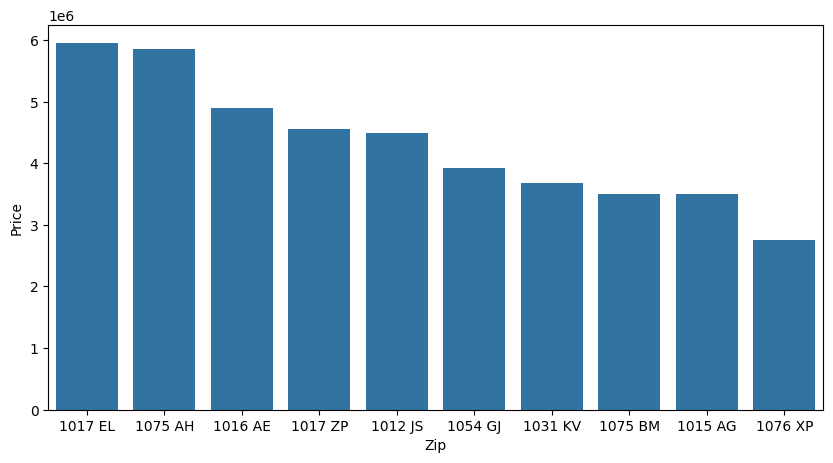

In [28]:
# plot a bar chart using seaborn
plt.figure(figsize=(10,5))
data = houseprices_sorted[0:10]
sns.barplot(data=data, x='Zip', y='Price')

Text(0.5, 1.0, 'Top 10 Areas with the highest house prices')

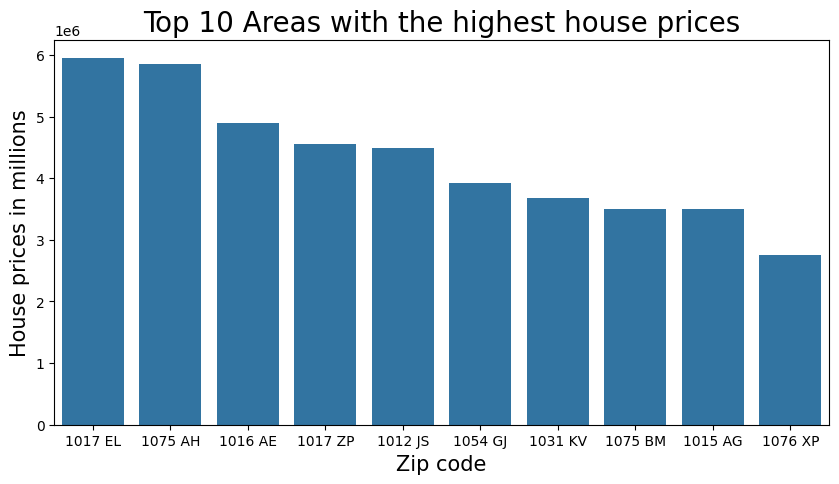

In [29]:
# Add other details to make the chart more informative
plt.figure(figsize= (10,5))
data = houseprices_sorted[0:10]

ax = sns.barplot(data= data, x= 'Zip',y = 'Price')
ax.set_xlabel('Zip code',fontsize = 15)
ax.set_ylabel('House prices in millions', fontsize = 15)
ax.set_title('Top 10 Areas with the highest house prices', fontsize= 20)

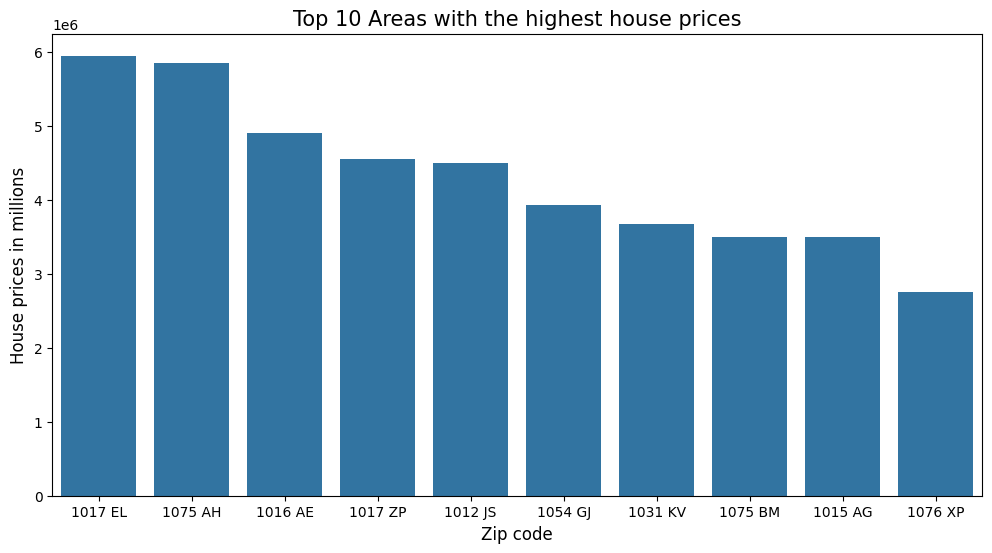

In [30]:
# Use Matplotlib methods for chart details
plt.figure(figsize= (12,6))
sns.barplot(data= data, x= 'Zip',y = 'Price')
plt.title('Top 10 Areas with the highest house prices', fontsize=15)
plt.xlabel('Zip code', fontsize = 12)
plt.xticks(fontsize=10)
plt.ylabel('House prices in millions', fontsize=12)
plt.yticks(fontsize=10)
plt.show()

Text(0.5, 1.0, 'Top 10 Areas with the highest price per sqm')

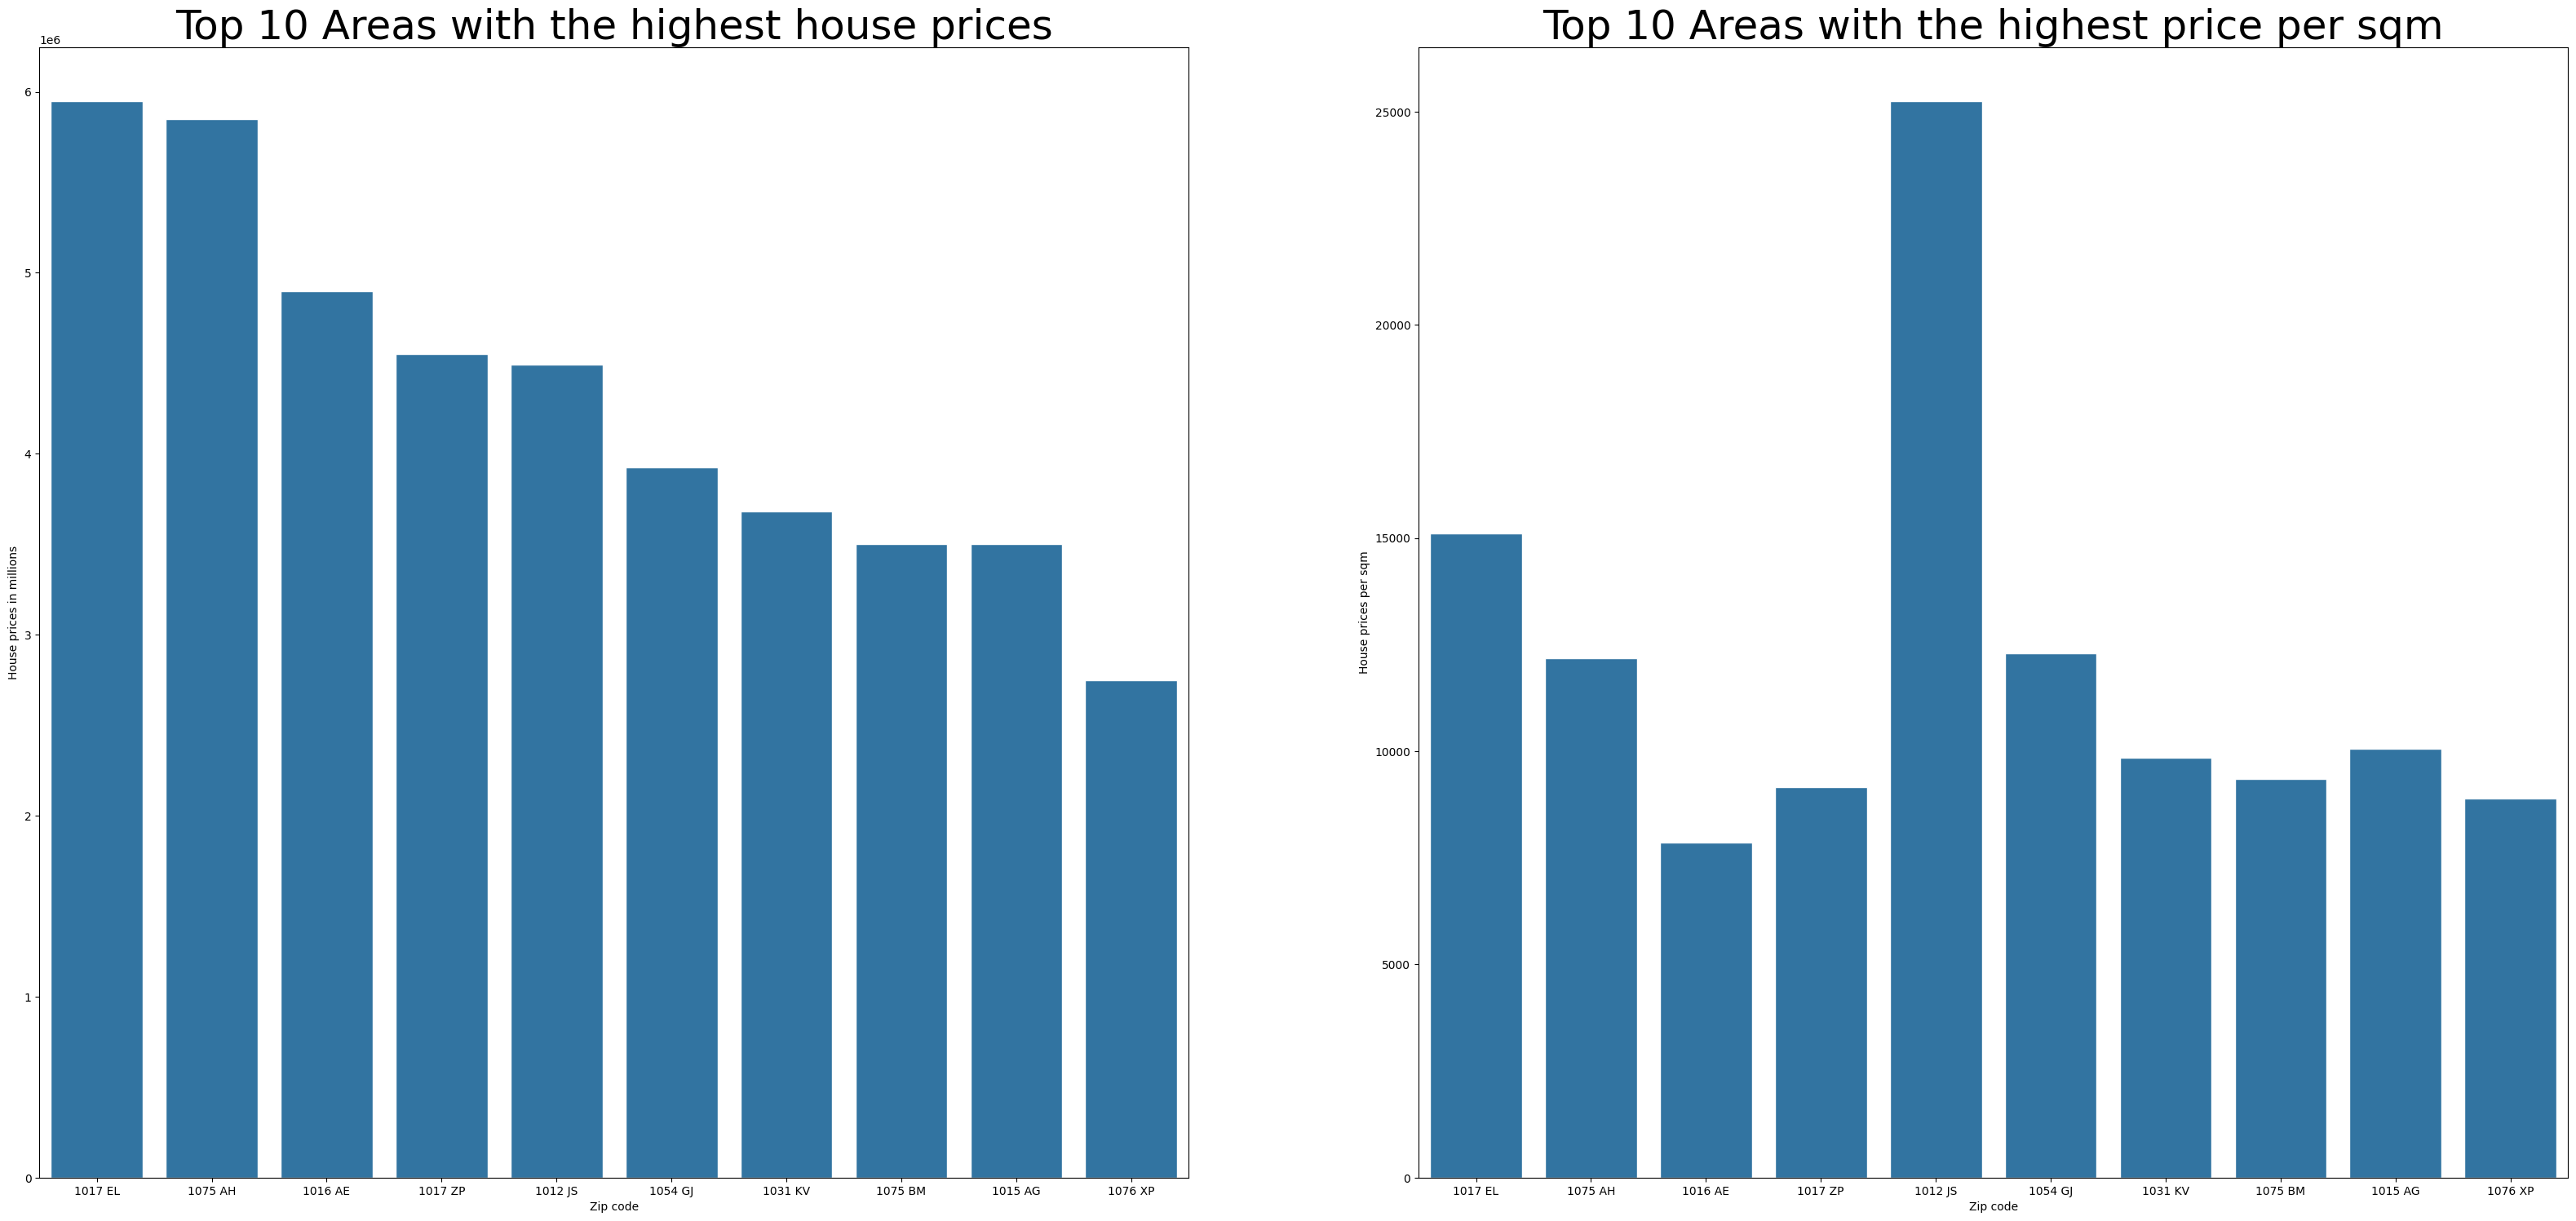

In [31]:
# Create subplot
fig, ax = plt.subplots(1, 2,figsize=(40,18))

data = houseprices_sorted[0:10]

sns.set(font_scale = 3)
ax1 = sns.barplot(data= data, x= 'Zip',y = 'Price', ax = ax[0])
ax1.set_xlabel('Zip code')
ax1.set_ylabel('House prices in millions')
ax1.set_title('Top 10 Areas with the highest house prices')


ax2 = sns.barplot(data= data, x= 'Zip',y = 'PriceperSqm', ax=ax[1])
ax2.set_xlabel('Zip code')
ax2.set_ylabel('House prices per sqm')
ax2.set_title('Top 10 Areas with the highest price per sqm')

## Visualizing data in GGPLOT
GGPLOT is an open source data visualization library originally built within the programming language R. Over the past few years, it has gained significant popularity. It is an implementation of the grammar of graphics, which is a high-level framework for creating plots in a consistent way. GGPLOT also has a Python implementation called plotnine.

The grammar of graphics consists of seven components that abstract the low-level details and allow you to focus on building aesthetically appealing visualizations. The components include data, aesthetics, geometric objects, facets, statistical transformations, coordinates, and themes. These components are described here:

- Data: This refers to the data we plan to visualize.
- Aesthetics: This refers to the variables we want to plot, that is, a single variable (x variable) or multiple variables (x and y variables).
- Geometric object: This refers to the graph we plan to use. An example could be a histogram...

In [34]:
from plotnine import *

In [33]:
houseprices_sorted.head()

,Zip,Price,Area,Room,PriceperSqm
195,1017 EL,5950000.0,394,10,15101.522843
837,1075 AH,5850000.0,480,14,12187.500000
305,1016 AE,4900000.0,623,13,7865.168539
103,1017 ZP,4550000.0,497,13,9154.929577
179,1012 JS,4495000.0,178,5,25252.808989


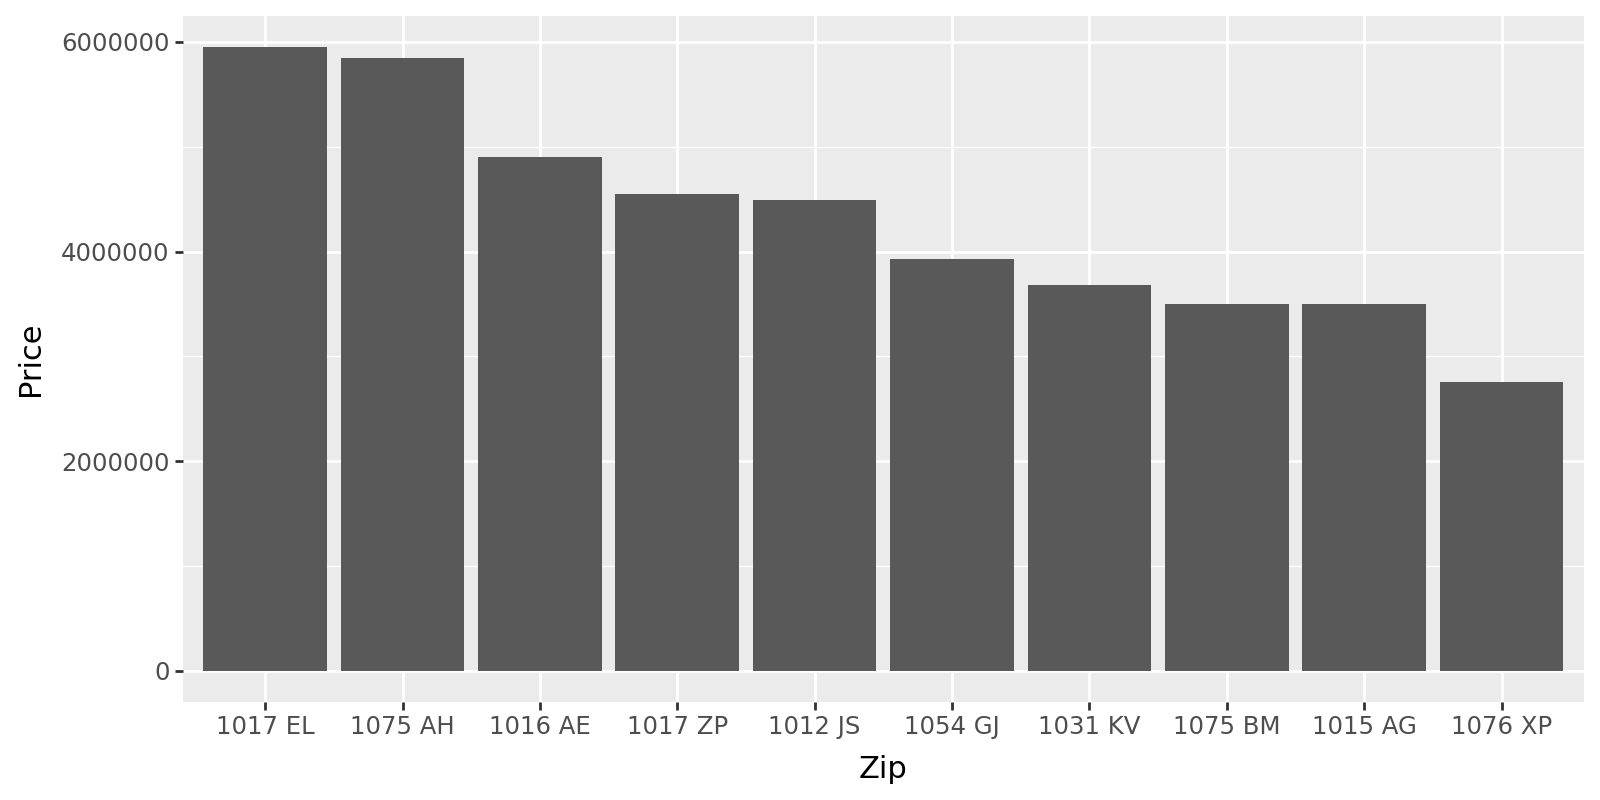

In [37]:
# plot a bar chart using GGPlot
chart_data = houseprices_sorted[0:10]
ggplot(chart_data, aes(x='Zip', y='Price')) + geom_bar(stat = 'identity') + \
scale_x_discrete(limits= chart_data['Zip'].tolist()) + theme(figure_size=(8,4))

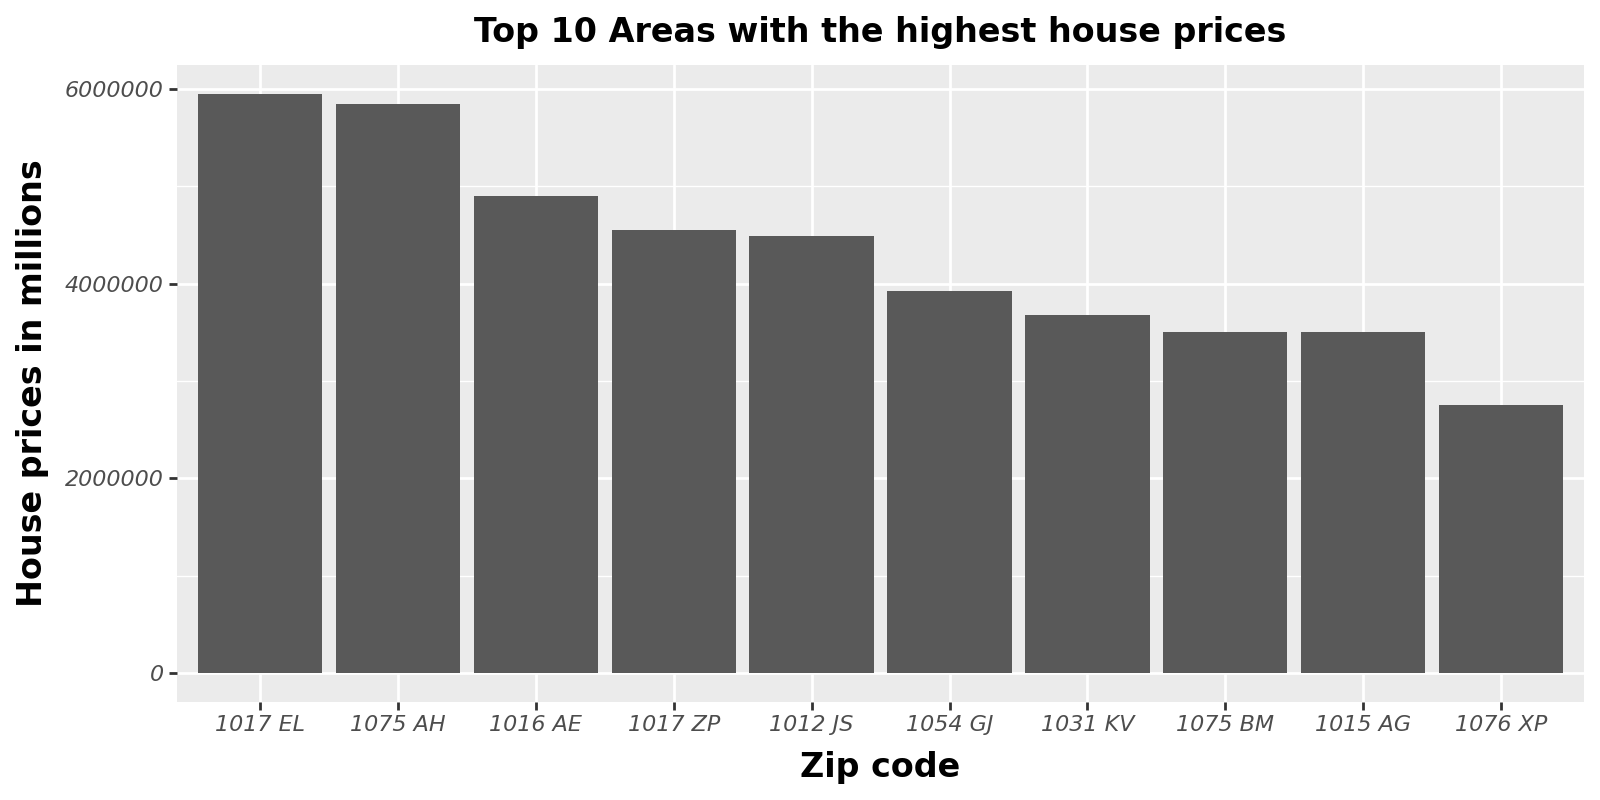

In [39]:
# Add other details to make the chart more informative
ggplot(chart_data,aes(x='Zip',y = 'Price')) + geom_bar(stat = 'identity') \
+ scale_x_discrete(limits=chart_data['Zip'].tolist()) \
+ labs(y='House prices in millions', x='Zip code', title='Top 10 Areas with the highest house prices') \
+ theme(figure_size=(8, 4),
        axis_title=element_text(face='bold',size =12),
          axis_text=element_text(face='italic',size =8),
          plot_title=element_text(face='bold',size=12))

## Visualizing data in Bokeh
Bokeh is another popular data visualization library in Python. Bokeh provides interactive and aesthetically appealing charts. These charts allow users to probe many scenarios interactively. Bokeh also supports custom JavaScript for special and advanced visualization use cases. With it, charts can be easily embedded into web pages.

Glyphs are the building blocks of bokeh visualizations. A glyph is a geometrical shape or marker that is used to represent data and create plots in bokeh. Typically, a plot consists of one or many geometrical shapes such as line, square, circle, rectangle, and so on. These shapes (glyphs) have visual information about the corresponding set of data.

Many of the important terms considered under the matplotlib recipe also apply to bokeh, and the syntax is also quite similar. We will explore bokeh through some examples.

In [40]:
from bokeh.plotting import figure, show
import bokeh.plotting as bk_plot
from bokeh.io import output_notebook
output_notebook()

In [46]:
# Plot a bar chart using Bokeh
data = houseprices_sorted[0:10]

fig = figure(x_range = data['Zip'],width = 600, height = 350)
fig.vbar(x= data['Zip'], top = data['Price'], width = 0.9)
show(fig)

In [47]:
# Plot a bar chart using Bokeh
fig = figure(x_range = data['Zip'], width = 600, height = 350,
             title = 'Top 10 Areas with the highest house prices', x_axis_label = 'Zip code',
             y_axis_label = 'House prices in millions')

fig.vbar(x= data['Zip'], top = data['Price'], width = 0.9)

fig.xaxis.axis_label_text_font_size = "15pt"
fig.xaxis.major_label_text_font_size = "10pt"
fig.yaxis.axis_label_text_font_size = "15pt"
fig.yaxis.major_label_text_font_size = "10pt"
fig.title.text_font_size = '15pt'

show(fig)

In [48]:
# Create Subplots
p1 = figure(x_range = data['Zip'],width = 480, height = 400,
             title = 'Top 10 Areas with the highest house prices', x_axis_label = 'Zip code',
             y_axis_label = 'House prices in millions')
p1.vbar(x= data['Zip'], top = data['Price'], width = 0.9)
p2 = figure(x_range = data['Zip'],width = 480, height = 400,
             title = 'Top 10 Areas with the highest house prices per sqm', x_axis_label = 'Zip code',
             y_axis_label = 'House prices per sqm')
p2.vbar(x= data['Zip'], top = data['PriceperSqm'], width = 0.9)
gp = bk_plot.gridplot(children=[[p1, p2]])
bk_plot.show(gp)